In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt

In [2]:
def one_hot_encoding(train_Y, val_Y, test_Y):
    '''
    Computing one hot encoding of output labels

    train_1H_Y= Computing one hot encoding of training labels train_Y
    val_1H_Y= Computing one hot encoding of validation labels val_Y
    test_1H_Y= Computing one hot encoding of test labels test_Y
    '''
    ## One Hot Encoding Training Set
    train_1H_Y = np.zeros((train_Y.shape[1], 10))
    train_1H_Y[np.arange(train_Y.shape[1]), train_Y] = 1
    train_1H_Y = train_1H_Y.T

    ## One Hot Encoding Validation Set
    val_1H_Y = np.zeros((val_Y.shape[1], 10))
    val_1H_Y[np.arange(val_Y.shape[1]), val_Y] = 1
    val_1H_Y = val_1H_Y.T

    ## One Hot Encoding Test Set
    tst_1H_Y = np.zeros((test_Y.shape[1], 10))
    tst_1H_Y[np.arange(test_Y.shape[1]), test_Y] = 1
    tst_1H_Y = tst_1H_Y.T
    return train_1H_Y,val_1H_Y,tst_1H_Y

def init_weights(layers,wght_ini = 0):
    '''
    Random Weight Initialization of each layer of Neural Network
    
    layers= list containing no. of hidden units in each layer
    wght_ini= option that provides random weight initialization or gaussian weight initialization
    
    params= output that contains random weights and biases for each layer
    ''' 
    params = {}
    L = len(layers)
    for l in range (1,L):
        if wght_ini == 0:
            params['W' + str(l)] = np.random.randn(layers[l],layers[l-1])*0.01
        else:
            params['W' + str(l)] = np.random.normal(0, 1/np.sqrt(layers[l-1]), (layers[l],layers[l-1]))
        params['b' + str(l)] = np.zeros((layers[l],1))
    return params

def relu(A_prev,W,B):
    '''Computing Relu Activation for a hidden layer
    A_prev= output of previous layer and input into current layer
    W = Weights of the current layer
    B = Bias of the current layer
    
    A= Relu Activation output for the current layer
    Cache= stores the inputs and the output computed
    '''
    Z = np.dot(W,A_prev) + B
    A = np.maximum(0,Z)
    linear_input = (A_prev,W,B)
    activation_output = A
    cache = (linear_input,activation_output)
    return A,cache

def sigmoid(A_prev,W,B,sigm = 0):
    '''
    Computing Sigmoid(s)/Tanh(x) Activation for a hidden layer

    A_prev= output of previous layer and input into current layer
    W = Weights of the current layer
    B = Bias of the current layer
    sigm = value 0 computes standard sigmoid and value 1 computes 1.7159tanh(2x/3)
    
    A= Sigmoid Activation output for the current layer
    Cache= stores the inputs and the output computed
    '''
    Z = np.dot(W,A_prev) + B
    if sigm == 0:
        A = 1./(1+np.exp(-Z))
    else:
        A = 1.7159*np.tanh(2*Z/float(3))
    linear_input = (A_prev,W,B)
    activation_output = A
    cache = (linear_input,activation_output)
    return A,cache

def softmax(A_prev,W,B):
    '''
    Computing Softmax Activation for a Output layer 
    
    A_prev= output of previous layer and input into current layer
    W = Weights of the current layer
    B = Bias of the current layer
    
    A= Softmax Activation output for the current layer
    Cache= stores the inputs and the output computed
    '''
    Z = np.dot(W,A_prev) + B
    Nr = np.exp(Z)
    Dr = np.sum(Nr, axis = 0, keepdims=True)
    A = np.divide(Nr,Dr)
    linear_input = (A_prev,W,B)
    activation_output = A
    cache = (linear_input,activation_output)
    return A,cache

def linear_prop_forward(X,parameters,sigm = 0):
    ''' 
    Implementation of Linear Forward Propagation of the Neural Network 
    
    X= Matrix of Input images data set
    parameters= Hidden layer weights and bias of all the layers
    sigm= 0: sigmoid activation, 1 : tanh(x) activation, 2: relu activation
    
    AL= output of softmax layer
    caches= contains cache of all the hidden layers
    '''
    L = int(len(parameters)/2)
    A = X
    caches = []
    for l in range(1,L):
        A_prev = A
        if sigm == 0 or sigm == 1:
            A,cache = sigmoid(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],sigm)
        if sigm == 2:
            A,cache = relu(A_prev,parameters['W'+str(l)],parameters['b'+str(l)])
        caches.append(cache)
    
    AL,cache = softmax(A,parameters['W'+str(L)],parameters['b'+str(L)])
    caches.append(cache)
    return AL, caches

def compute_cost(Y,AL):
    ''' 
    Cross Entropy Cost Computation 
    
    Y = Actual label of image data set
    AL= Softmax layers output
    
    cost= cross entropy cost of the mini-batch
    '''
    m = AL.shape[1]
    cost = -np.sum(np.multiply(Y,np.log(AL)))/m
    return cost

def relu_derivative(dA, activation_cache):
    ''' 
    Relu Derivative Calculation for hidden layer 
    
    dA= gradient of cost w.r.t to current layers output
    activation_cache= output value of current layer computed during forward propagation
    
    dZ= derivative of cost w.r.t to current layer activation input
    '''
    relu_deriv = activation_cache>0
    dZ = np.multiply(dA,relu_deriv)
    return dZ

def sigmoid_derivative(dA, activation_cache,sigm = 0):
    ''' 
    Sigmoid Derivative Calculation for hidden layer 
    
    dA= gradient of cost w.r.t to current layers output
    activation_cache= output value of current layer computed during forward propagation
    sigm= 0: dZ calculation w.r.t to sigmoid, 1: dZ calculation w.r.t tanh(x) activation
    
    dZ= derivative of cost w.r.t to current layer activation input
    '''
    if sigm == 0:
        dZ = np.multiply(dA,activation_cache*(1-activation_cache))
    else:      
        activation_cache = activation_cache/float(1.7159)
        dZ = np.multiply(dA,(1 - np.multiply(activation_cache,activation_cache))*1.7159*2/float(3))
    return dZ

def grad_calculation(dZ, cache):
    ''' 
    Gradient Calculation for hidden layer paramenters 
    
    dZ=derivative of cost w.r.t to current layer activation input
    cache= inputs computed during forward propagation
    
    dA_Prev= gradient of previous layers output
    dW= gradient of weight for current layer
    db= gradient of bias for current layer
    '''
    A_Prev, W, b = cache
    m = A_Prev.shape[1]
    dW = np.dot(dZ, A_Prev.T)/m
    db = np.sum(dZ, axis = 1, keepdims=True)/m
    dA_Prev = np.dot(W.T, dZ)
    return (dA_Prev, dW, db)

def linear_prop_backward(AL,Y,caches,sigm = 0):
    ''' 
    Implementation of Linear Backward Propagation thereby computing gradients of all the hidden layer parameters 
    
    AL= Outputs computed by Softmax Layer 
    Y= Actual one hot encoding of Image Data set
    caches= linear and activation caches during forward propagation for all the hidden layers
    sigm= 0: sigmoid derivative to be used, 1: tanh derivative to be used, 2: relu derivative to be used
    
    grad= gradients computed for all hidden layer parameters
    '''
    L = len(caches)
    grad = {}
    current_cache = caches[L-1]
    linear_cache, activation_cache = current_cache    
    grad["dA"+str(L)],grad["dW"+str(L)],grad["db" + str(L)] = grad_calculation(Y-AL,linear_cache)
    for i in reversed (range(L-1)):
        current_cache = caches[i]
        if sigm == 0 or sigm == 1:
            dZ = sigmoid_derivative(grad["dA"+str(i+2)], current_cache[1], sigm)
        if sigm == 2:
            dZ = relu_derivative(grad["dA"+str(i+2)], current_cache[1])
        grad["dA"+str(i+1)],grad["dW"+str(i+1)],grad["db" + str(i+1)] = grad_calculation(dZ, current_cache[0])
    return grad

def update_params(params, grad, lr):
    ''' 
    Updating hidden layer parameters 
    
    params= parameters of hidden layers
    grad= gradients computed for all hidden layer parameters
    lr = learning rate
    
    params= updated parameters of hidden layers
    '''
    L = int(len(params)/2)
    for l in range(L):
        params["W"+str(l+1)] = params["W"+str(l+1)] + lr*grad["dW"+str(l+1)]
        params["b"+str(l+1)] = params["b"+str(l+1)] + lr*grad["db"+str(l+1)]
    return params

def predict(X,Y,parameters,sigm = 0):
    ''' 
    Accuracy Prediction for input data set
    
    X= input matrix of images data set
    Y= actual labels of input data set images
    parameters= hidden layer parameters
    sigm= 0: sigmoid activation, 1: tanh(x) activation, 2: relu activation, for hidden layers
    
    accuracy= percentage correct predicted by the neural network model
    '''
    AL,_ = linear_prop_forward(X,parameters,sigm)
    ypred = np.argmax(AL, axis = 0).reshape(Y.shape[0],Y.shape[1])
    count = 0
    for i in range(Y.shape[1]):
        if ypred[0,i] == Y[0,i]:
            count = count + 1
    accuracy = count/Y.shape[1]*100
    return accuracy

def get_mb(X, Y, mb_size = 64): 
    '''
    Generating Mini Batches of a given mini-batch size 
    
    X= Huge Training Data set of Input Images
    Y= Actual Output labels of Input Images
    mb_size= Mini batch size
    
    mini_batches= list of all minibatches generated of given mini batch size
    '''
    m = X.shape[1] 
    mini_batches = []
    shuf_nums = list(np.random.permutation(m))
    rand_X = X[:, shuf_nums]
    rand_Y = Y[:, shuf_nums].reshape((10,m))
    total_mb = int(m/mb_size)
    for i in range(0, total_mb):
        mb_X,mb_Y = rand_X[:,i*mb_size : (i+1)*mb_size], rand_Y[:,i*mb_size : (i+1)*mb_size]
        mini_batch = (mb_X, mb_Y)
        mini_batches.append(mini_batch)
    
    if m % mb_size != 0:
        mb_X, mb_Y = rand_X[:,total_mb * mb_size:], rand_Y[:,total_mb * mb_size:]
        mini_batch = (mb_X, mb_Y)
        mini_batches.append(mini_batch)
    return mini_batches

def momentum_v_init(params):
    ''' 
    Initialization of Momentum Parameter "v" 
    
    params= parameters weights and bias of all the hidden layers
    
    v= velocity initialization for the respective hidden layers
    '''
    L = int(len(params)/2)
    v = {}
    for l in range(L):
        v["dW" + str(l + 1)] = np.zeros_like(params["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(params["b" + str(l+1)])
    return v

def momentum_update(params, grads, v, lr):
    """
    Momentum Gradient Descent Update for hidden layer parameters
    
    params= Hidden layer parameters to be updated of all the input layers
    grads= gradients computed using backward propagation
    v= momentum parameters of all the hidden layers
    lr= learning rate
    
    params= updated parameters using momentum gradient descent for hidden layers
    v= storing momentum of the corresponding layer
    """
    L = int(len(params)/2)
    for l in range(L):
        v["dW" + str(l + 1)]     = 0.9*v["dW" + str(l + 1)] + .1*grads['dW' + str(l + 1)]
        v["db" + str(l + 1)]     = 0.9*v["db" + str(l + 1)] + .1*grads['db' + str(l + 1)]
        params["W" + str(l + 1)] = params["W" + str(l + 1)] + lr*v["dW" + str(l + 1)]
        params["b" + str(l + 1)] = params["b" + str(l + 1)] + lr*v["db" + str(l + 1)]
    return params, v

def multi_layer_model(X, Y_1H, Y, val_X, val_Y, test_X, test_Y, layers_dims, learning_rate=0.005, 
                      num_iterations=50, mini_batch_size = 64,sigm=0, wght_ini = 0, momentum = 0):
    '''
    Multi layer Neural Network that learns classification of digits and accurately predits their classes
    
    X= Input training set on which the Model traings
    Y_1H= one hot encoded input of the corresponding input images
    Y= Class labels of training images dataset
    val_X= Validation images dataset
    val_Y= Class labels of validation images dataset
    test_X= Test images dataset
    test_Y= Class labels of test images dataset
    layer_dims= hidden units in each layer of the network
    learning_rate= learning rate to be used for gradient update
    num_iterations= number of epochs of the training set
    mini_batch_size= size of the mini batches to be generated from input training set
    sigm= activation function to be used for hidden layers, 0: sigmoid, 1: tanh(x), 2:relu
    wght_ini= weight initialization of hidden layers, 0: random, 1: normal distribution with 0 mean and sqrt(fan_in) variance
    momentum= 0: use standard gradient descent update, 1: use momentum gradient descent update
    
    parameters= weights and bias learnt after iterating through the trianing set
    '''
    parameters = init_weights(layers_dims,wght_ini)
    v     = momentum_v_init(parameters)
    costs     = []
    train_acc = []
    val_acc   = []
    test_acc  = []
    for i in range(num_iterations):
        mini_batches = get_mb(X, Y_1H, mini_batch_size)
        for m in mini_batches:
            mini_X,mini_Y = m
            AL,caches = linear_prop_forward(mini_X,parameters,sigm)
            cost = compute_cost(mini_Y,AL)
            grads = linear_prop_backward(AL,mini_Y,caches,sigm)
            if momentum == 0:
                parameters = update_params(parameters,grads,learning_rate)
            else:
                parameters, v = momentum_update(parameters, grads, v, learning_rate)
            costs.append(cost)
 
        train_acc.append(predict(X,     Y,       parameters, sigm))
        val_acc.append(predict(val_X,   val_Y,   parameters, sigm))
        test_acc.append(predict(test_X, test_Y,  parameters, sigm))
        
    plt.plot(costs)
    plt.ylabel('Training Cost')
    plt.xlabel('#Mini Batch Iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    plt.plot(train_acc, label= "Train Acc")
    plt.plot(val_acc, label= "Val Acc")
    plt.plot(test_acc, label= "Test Acc")
    plt.ylabel('Accuracy')
    plt.xlabel('#Epoch')
    plt.legend(loc = 4, fontsize = 'medium')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

In [3]:
def oil_spill_model(path = ""):
    '''
    Reading Training and Test Data Sets, Normalizing them by dividing by 225,
    Splitting Training set into Training and Validation Set
    
    path= path of directory containing the training and test datasets

    train_X, train_Y= Reading Training Input Data in train_X and their actual labels in train_Y
    val_X, val_Y= Contains Validation Set Input Data in val_X and the corresponding labels in val_Y
    test_X, testY= Contains Test Input Data in test_X and Test labels in test_Y
    
    acc_train= Accuracy on Training Model
    acc_val= Accuracy on Validation Model
    acc_test= Accuracy on Test Model
    '''

    train_X, train_Y = MNIST(path, gz = True).load_training()
    test_X,  test_Y  = MNIST(path, gz = True).load_testing()

    train_X = (np.array(train_X).T)/255
    train_Y = np.array(train_Y)
    train_Y = train_Y.reshape(1,60000)

    val_X   = train_X[:,50000:60000]
    train_X = train_X[:,:50000]

    val_Y   = train_Y[:,50000:60000]
    train_Y = train_Y[:,:50000]

    test_X = (np.array(test_X).T)/255
    test_Y = np.array(test_Y).reshape(1,10000)

    print ("Shape of Training Data set", train_X.shape, train_Y.shape)
    print ("Shape of Validation Data set", val_X.shape,   val_Y.shape)
    print ("Shape of Test Data set", test_X.shape,  test_Y.shape)

    ## Required parameters
    activation  = 2
    layers_dims = [784,64,10]
    train_1H_Y,val_1H_Y,tst_1H_Y = one_hot_encoding(train_Y,val_Y,test_Y)

    ## Running the Mlti Layer Neural Network Model
    parameters = multi_layer_model(train_X, train_1H_Y, train_Y, val_X, val_Y, test_X, test_Y,
                                   layers_dims, num_iterations=220, learning_rate=0.04, 
                                   mini_batch_size = 128, sigm=activation, 
                                   wght_ini = 0, momentum = 0)

    ## Predicting Accuracy of Trained Model
    acc_train = predict(train_X, train_Y, parameters, sigm = activation)
    acc_val   = predict(val_X,   val_Y,   parameters, sigm = activation)
    acc_test  = predict(test_X,  test_Y,  parameters, sigm = activation)
    print ("Training Accuracy = ", acc_train)
    print ("Validation Accuracy = ", acc_val)
    print ("Test Accuracy = ", acc_test)
    
    return acc_train,acc_val,acc_test

Shape of Training Data set (784, 50000) (1, 50000)
Shape of Validation Data set (784, 10000) (1, 10000)
Shape of Test Data set (784, 10000) (1, 10000)


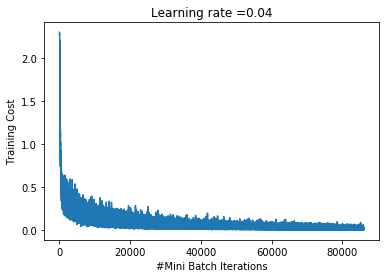

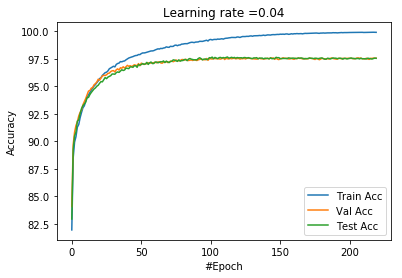

Training Accuracy =  99.92
Validation Accuracy =  97.57000000000001
Test Accuracy =  97.56


In [4]:
acc_train, acc_val, acc_test = oil_spill_model("./data")